In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from __stats__ import *
from __plt__ import *

In [2]:
output_path = r'E:/databases/Merged.csv'
bids_age_plt = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
DataFrame = pd.read_csv(output_path)

DataFrame = DataFrame[DataFrame['BPT'] == 'AGNXY']
DataFrame.reset_index(inplace=True, drop=True)

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_10792\164497969.py:3: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(output_path)


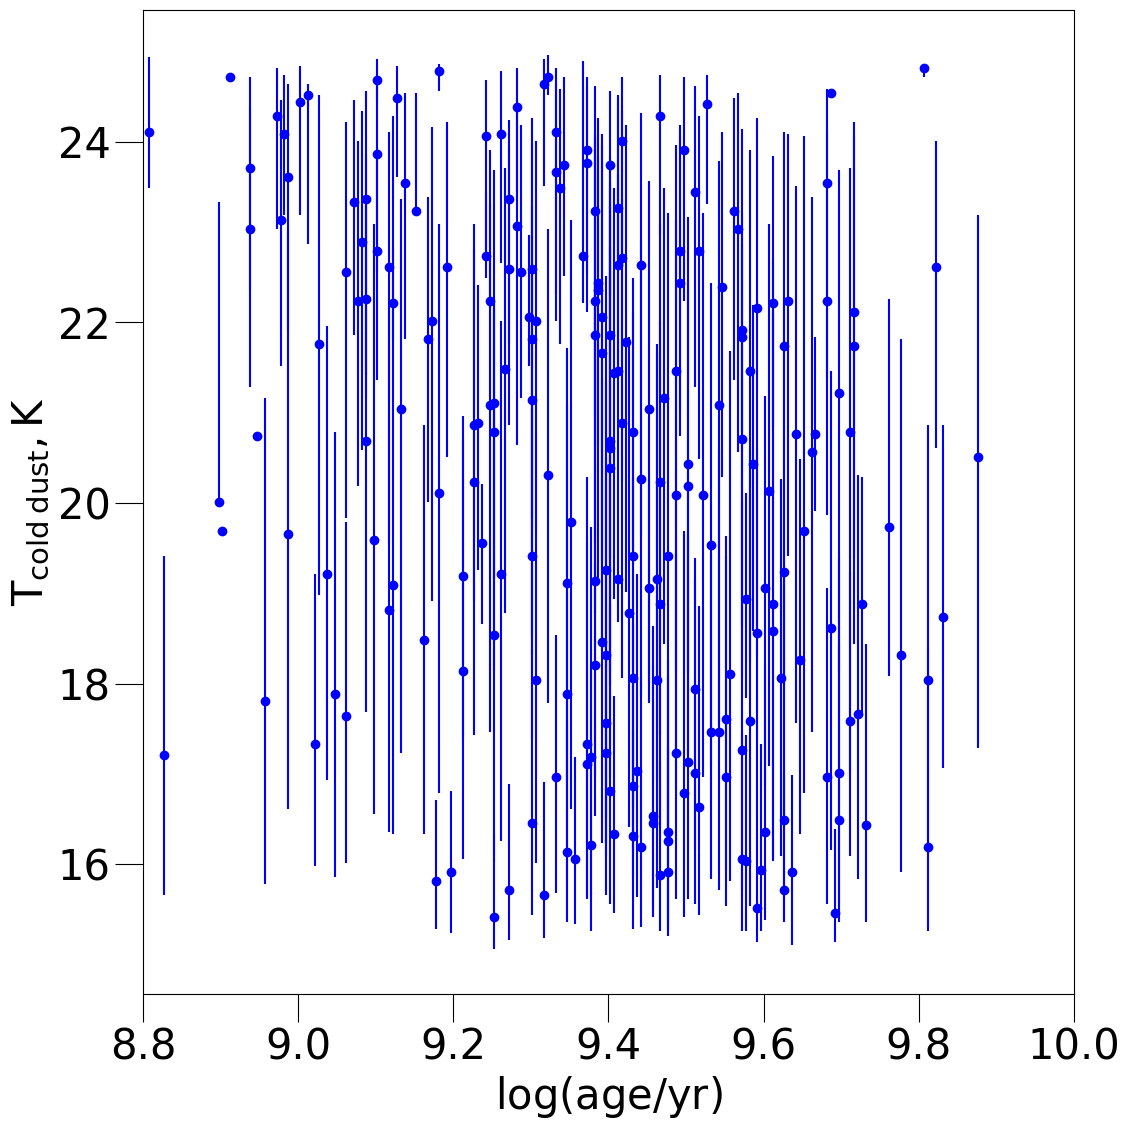

In [3]:
gs_top = plt.GridSpec(1, 1, wspace=0, hspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax = fig.add_subplot(gs_top[0,0])
ax.set_xlim(8.8, 10.0)
ax.set_xlabel(r'$\mathrm{log(age/yr)}$')
ax.set_ylabel(r'$\mathrm{T_{cold \: dust}, K}$')
ax.errorbar(DataFrame['ager_percentile50'], DataFrame['T_C_ISM_percentile50'], yerr=[DataFrame['T_C_ISM_percentile50'] - DataFrame['T_C_ISM_percentile16'], DataFrame['T_C_ISM_percentile84'] - DataFrame['T_C_ISM_percentile50']], c='blue', fmt='o')

fig.savefig('MONTE_0.pdf')

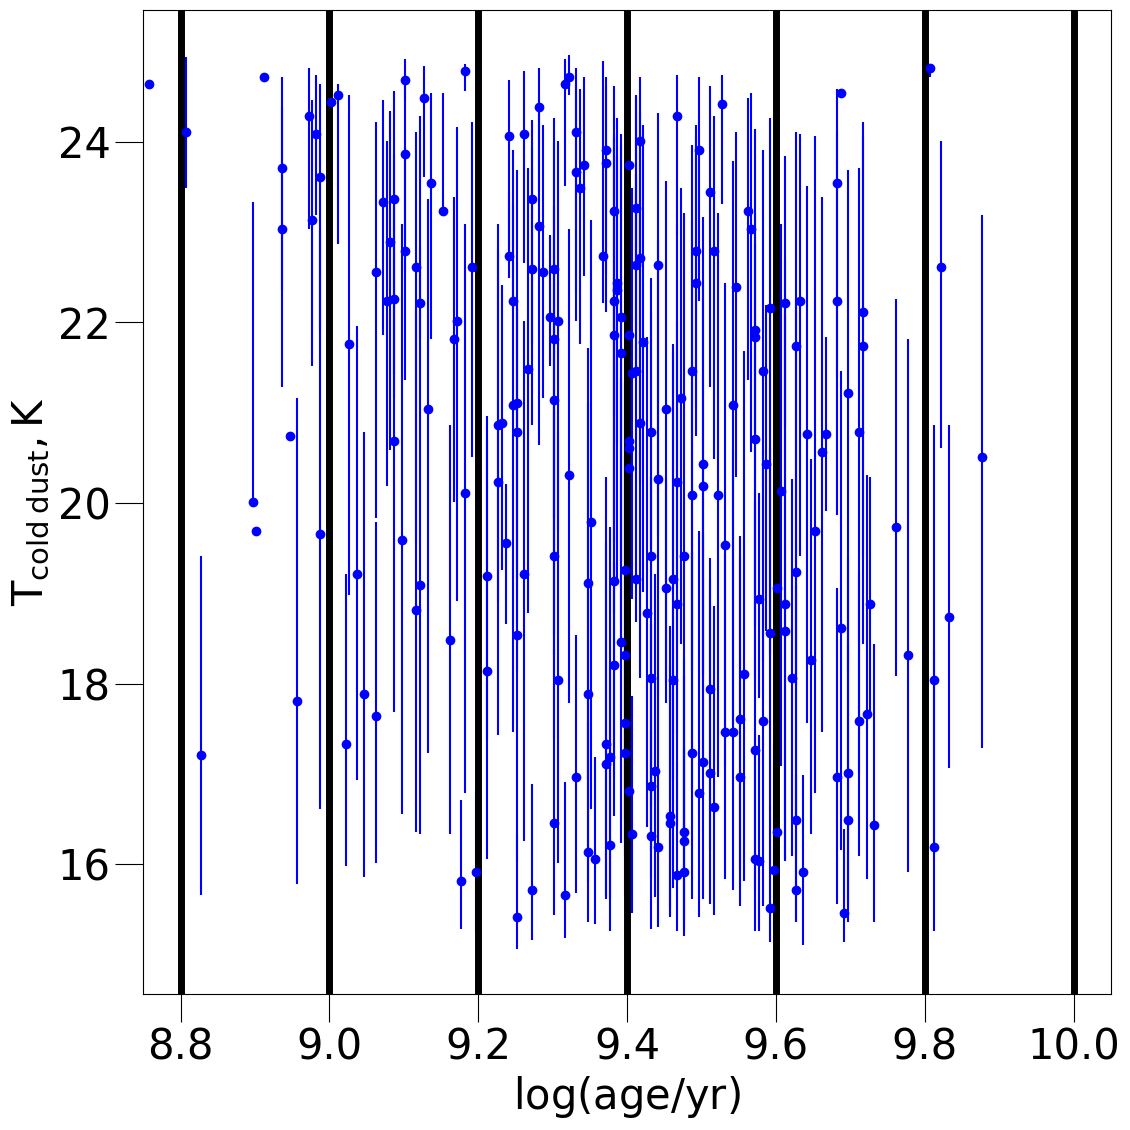

In [4]:
gs_top = plt.GridSpec(1, 1, wspace=0, hspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax = fig.add_subplot(gs_top[0,0])

ax.set_xlim(8.75, 10.05)
ax.set_xlabel(r'$\mathrm{log(age/yr)}$')
ax.set_ylabel(r'$\mathrm{T_{cold \: dust}, K}$')
ax.errorbar(DataFrame['ager_percentile50'], DataFrame['T_C_ISM_percentile50'], yerr=[DataFrame['T_C_ISM_percentile50'] - DataFrame['T_C_ISM_percentile16'], DataFrame['T_C_ISM_percentile84'] - DataFrame['T_C_ISM_percentile50']], c='blue', fmt='o')

ax.axvline(8.8, c='black', linewidth=5)
ax.axvline(9.0, c='black', linewidth=5)
ax.axvline(9.2, c='black', linewidth=5)
ax.axvline(9.4, c='black', linewidth=5)
ax.axvline(9.6, c='black', linewidth=5)
ax.axvline(9.8, c='black', linewidth=5)
ax.axvline(10.0, c='black', linewidth=5)

fig.savefig('MONTE_1.pdf')

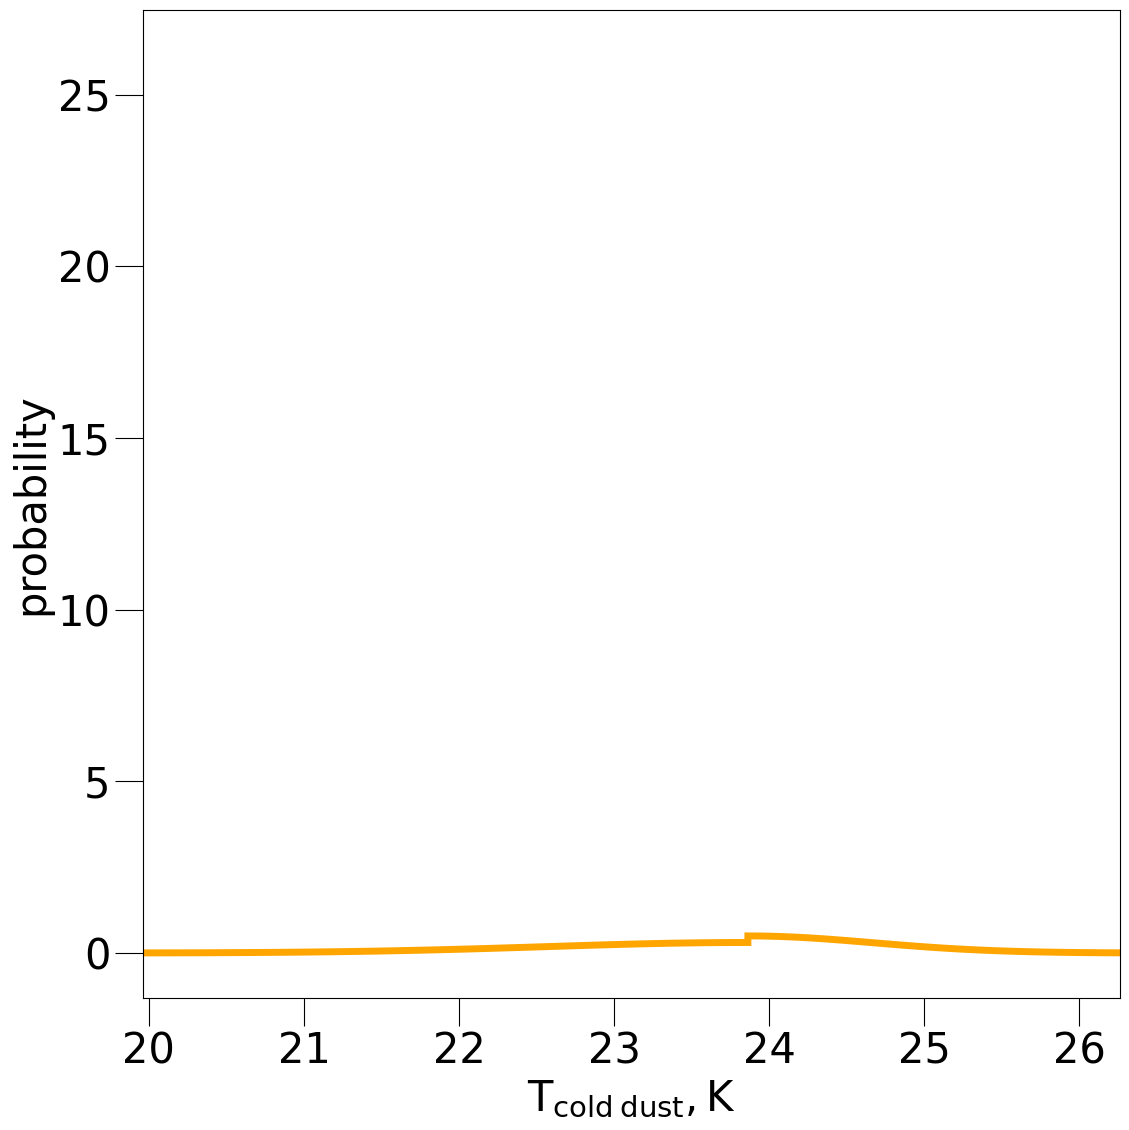

In [5]:
from scipy.stats import norm 
import statistics

gs_top = plt.GridSpec(1, 1, wspace=0, hspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax = fig.add_subplot(gs_top[0,0])

ax.set_xlabel(r'$\mathrm{T_{cold \: dust}, K}$')
ax.set_ylabel(r'probability')
ax.errorbar(DataFrame['ager_percentile50'], DataFrame['T_C_ISM_percentile50'], yerr=[DataFrame['T_C_ISM_percentile84'] - DataFrame['T_C_ISM_percentile50'], DataFrame['T_C_ISM_percentile50'] - DataFrame['T_C_ISM_percentile16']], c='blue', fmt='o')

mean = DataFrame['T_C_ISM_percentile50'][25]
sigma_up = DataFrame['T_C_ISM_percentile84'][25] - mean
sigma_down = mean - DataFrame['T_C_ISM_percentile16'][25]
x_up = np.arange(mean, mean+3*sigma_up, 0.1)
x_down = np.arange(mean-3*sigma_down, mean, 0.1)
ax.set_xlim(mean-3*sigma_down, mean+3*sigma_up)
ax.plot(x_up, norm.pdf(x_up, mean, sigma_up), c='orange', linewidth=5)
ax.plot(x_down, norm.pdf(x_down, mean, sigma_down), c='orange', linewidth=5)
fig.savefig('MONTE_2.pdf')

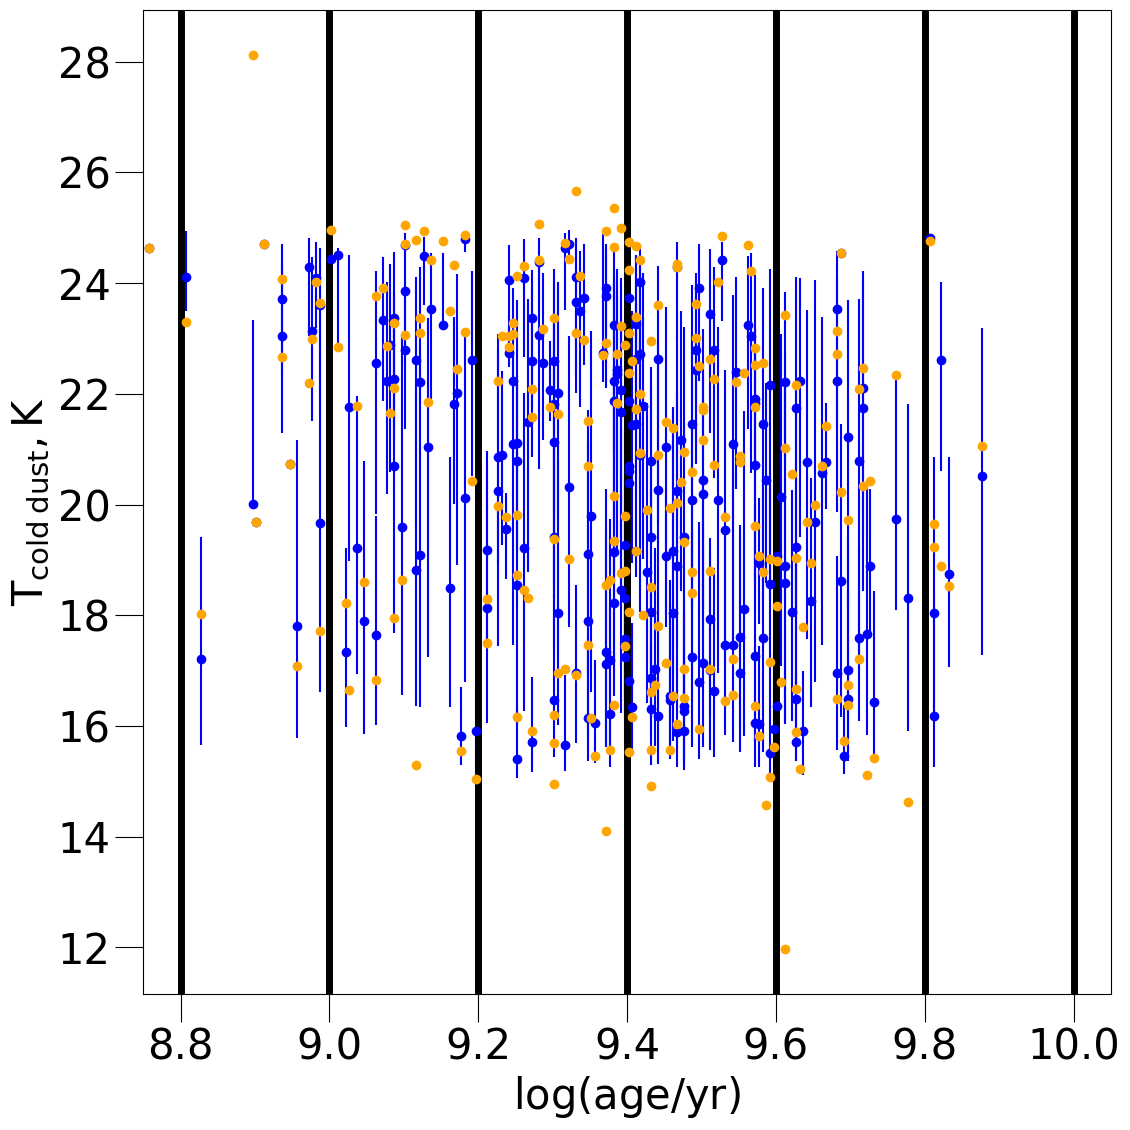

In [6]:
import random

gs_top = plt.GridSpec(1, 1, wspace=0, hspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax = fig.add_subplot(gs_top[0,0])

ax.set_xlim(8.75, 10.05)
ax.set_xlabel(r'$\mathrm{log(age/yr)}$')
ax.set_ylabel(r'$\mathrm{T_{cold \: dust}, K}$')

ax.errorbar(DataFrame['ager_percentile50'], DataFrame['T_C_ISM_percentile50'], yerr=[DataFrame['T_C_ISM_percentile50'] - DataFrame['T_C_ISM_percentile16'], DataFrame['T_C_ISM_percentile84'] - DataFrame['T_C_ISM_percentile50']], c='blue', fmt='o')

ax.axvline(8.8, c='black', linewidth=5)
ax.axvline(9.0, c='black', linewidth=5)
ax.axvline(9.2, c='black', linewidth=5)
ax.axvline(9.4, c='black', linewidth=5)
ax.axvline(9.6, c='black', linewidth=5)
ax.axvline(9.8, c='black', linewidth=5)
ax.axvline(10.0, c='black', linewidth=5)

mean = DataFrame['T_C_ISM_percentile50']
sigma_up = DataFrame['T_C_ISM_percentile84'] - mean
sigma_down = mean - DataFrame['T_C_ISM_percentile16']

x = np.arange(14, 26, 0.1)

for i in range(len(DataFrame['ager_percentile50'])):
    if random.random() > 0.5:
        ax.errorbar(DataFrame['ager_percentile50'][i], mean[i] + abs(random.gauss(0, sigma_up[i])), c='orange', fmt='o')
    else:
        ax.errorbar(DataFrame['ager_percentile50'][i], mean[i] - abs(random.gauss(0, sigma_down[i])), c='orange', fmt='o')

fig.savefig('MONTE_3.pdf')

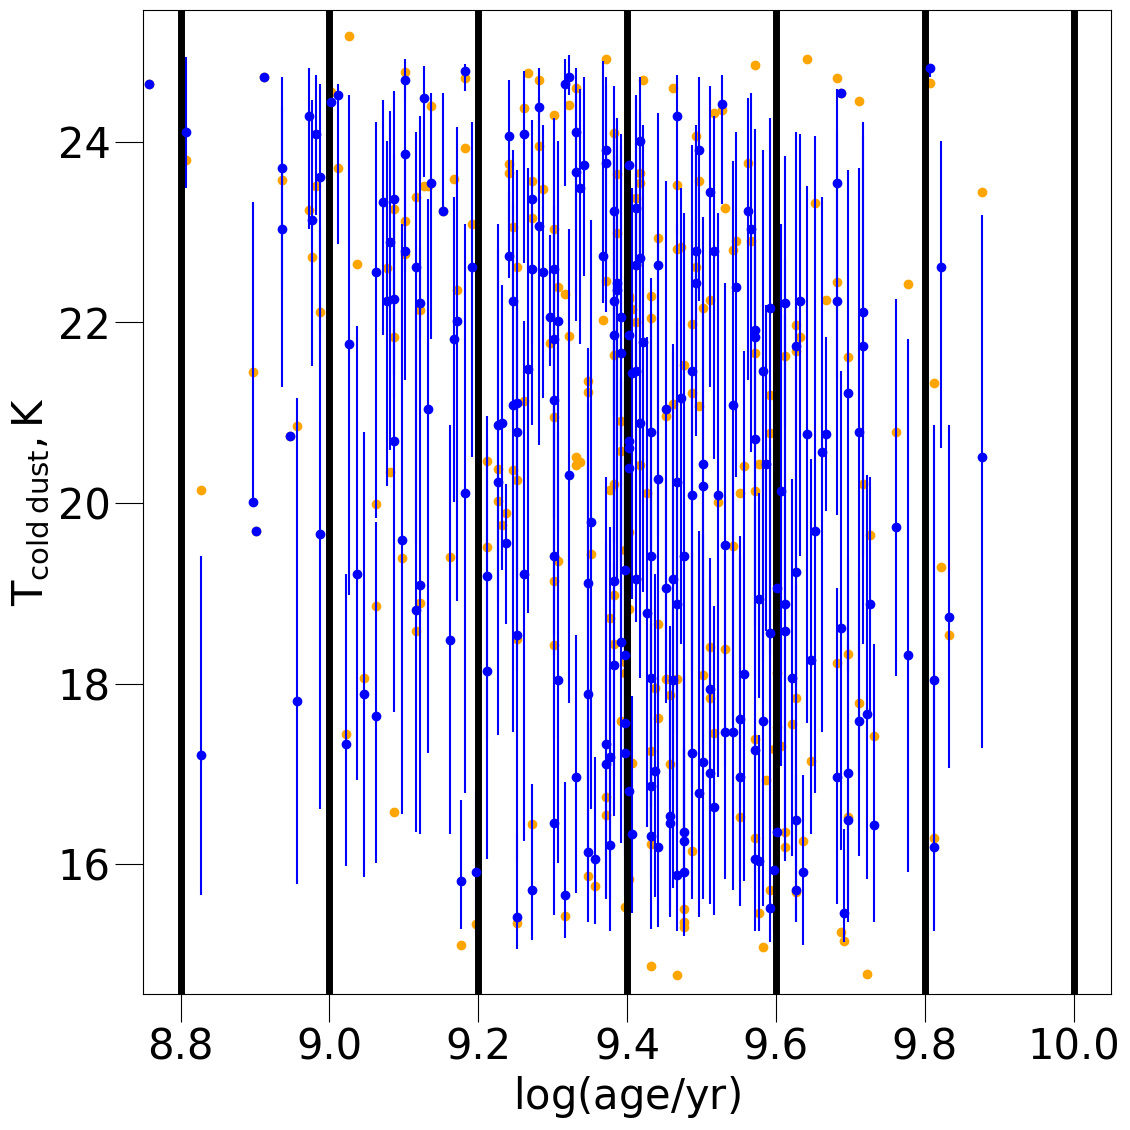

In [7]:
import matplotlib.animation as animation
import random

gs_top = plt.GridSpec(1, 1, wspace=0, hspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax = fig.add_subplot(gs_top[0,0])

ax.set_xlim(8.75, 10.05)
ax.set_xlabel(r'$\mathrm{log(age/yr)}$')
ax.set_ylabel(r'$\mathrm{T_{cold \: dust}, K}$')

ax.errorbar(DataFrame['ager_percentile50'], DataFrame['T_C_ISM_percentile50'], yerr=[DataFrame['T_C_ISM_percentile50'] - DataFrame['T_C_ISM_percentile16'], DataFrame['T_C_ISM_percentile84'] - DataFrame['T_C_ISM_percentile50']], c='blue', fmt='o')

ax.axvline(8.8, c='black', linewidth=5)
ax.axvline(9.0, c='black', linewidth=5)
ax.axvline(9.2, c='black', linewidth=5)
ax.axvline(9.4, c='black', linewidth=5)
ax.axvline(9.6, c='black', linewidth=5)
ax.axvline(9.8, c='black', linewidth=5)
ax.axvline(10.0, c='black', linewidth=5)

y = DataFrame['T_C_ISM_percentile50']
scat = ax.scatter(DataFrame['ager_percentile50'], y, c='orange')

def update(frame):
    x = DataFrame['ager_percentile50']
    mean = DataFrame['T_C_ISM_percentile50']
    sigma_up = DataFrame['T_C_ISM_percentile84'] - mean
    sigma_down = mean - DataFrame['T_C_ISM_percentile16']
    y = []
    for i in range(len(DataFrame['ager_percentile50'])):
        if random.random() > 0.5:
            y.append(mean[i] + abs(random.gauss(0, sigma_up[i])))
        else:
            y.append(mean[i] - abs(random.gauss(0, sigma_down[i])))

    data = np.stack([x, y]).T
    scat.set_offsets(data)
    return scat

ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=300)
ani.save(filename="giphy.gif", writer="pillow")